In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
aapl = pd.read_csv('AAPL.csv', index_col="date", skiprows=[1])
goog = pd.read_csv('GOOG.csv', index_col="date", skiprows=[1])
amzn = pd.read_csv('AMZN.csv', index_col="date", skiprows=[1])
msft = pd.read_csv('MSFT.csv', index_col="date", skiprows=[1])

In [7]:
aapl.head()

,close,volume,open,high,low
date,,,,,
2019/08/23,202.64,46882840.0,209.43,212.0510,201.0000
2019/08/22,212.46,22267820.0,213.19,214.4350,210.7500
2019/08/21,212.64,21564750.0,212.99,213.6500,211.6032
2019/08/20,210.36,26919530.0,210.88,213.3500,210.3200
2019/08/19,210.35,24431920.0,210.62,212.7307,210.0250


In [8]:
amzn.sort_values(by=["date"], ascending=True, inplace=True)

In [9]:
def nasdaq_forcast(*args):
    for dataset in args:      
        dataset.sort_values(by=["date"], ascending=True, inplace=True)

In [10]:
nasdaq_forcast(goog, aapl, msft, amzn)

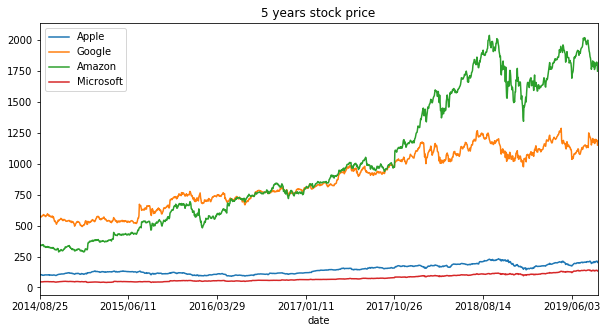

In [11]:
aapl["close"].plot(figsize=(10,5), label="Apple", title="5 years stock price")
goog["close"].plot(label="Google")
amzn["close"].plot(label="Amazon")
msft["close"].plot(label="Microsoft")
plt.legend()

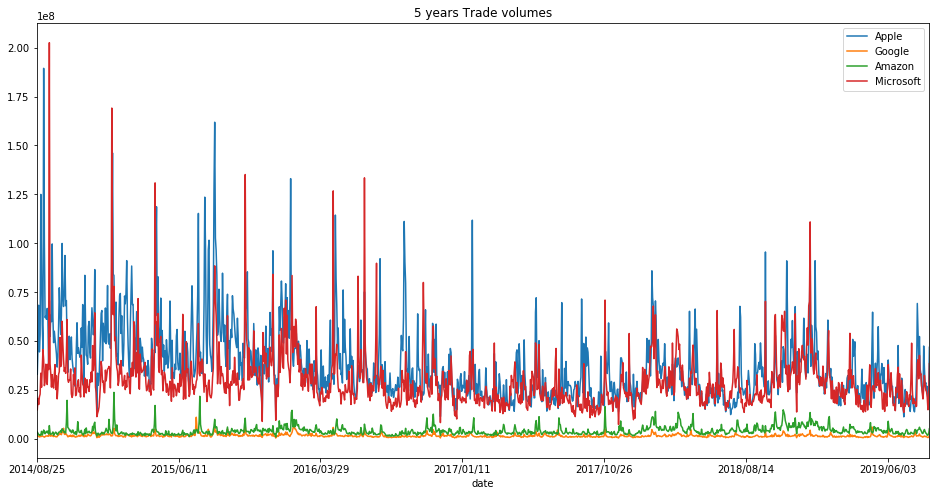

In [12]:
aapl["volume"].plot(figsize=(16,8), label="Apple", title="5 years Trade volumes")
goog["volume"].plot(label="Google")
amzn["volume"].plot(label="Amazon")
msft["volume"].plot(label="Microsoft")
plt.legend()

In [13]:
msft["volume"].argmax()

'2014/09/19'

In [14]:
msft["volume"].argmin()

'2017/11/24'

In [15]:
goog["volume"].argmax()

'2015/07/17'

In [16]:
aapl.head()

,close,volume,open,high,low
date,,,,,
2014/08/25,101.540,40087220.0,101.79,102.17,101.28
2014/08/26,100.889,33079170.0,101.42,101.50,100.86
2014/08/27,102.130,46807000.0,101.02,102.57,100.70
2014/08/28,102.250,68368740.0,101.59,102.78,101.56
2014/08/29,102.500,44516120.0,102.86,102.90,102.20


# Total Trade amount

In [17]:
aapl["Total Trade"] = aapl["close"]*aapl["volume"]
goog["Total Trade"] = goog["close"]*goog["volume"]
msft["Total Trade"] = msft["close"]*msft["volume"]
amzn["Total Trade"] = amzn["close"]*amzn["volume"]

In [18]:
amzn.head()

,close,volume,open,high,low,Total Trade
date,,,,,,
2014/08/25,334.02,1955360.0,333.21,336.7700,332.71,6.531293e+08
2014/08/26,341.83,3635270.0,337.00,344.3600,334.55,1.242644e+09
2014/08/27,343.18,2961440.0,342.09,346.6700,341.34,1.016307e+09
2014/08/28,340.02,2252212.0,340.00,341.7900,338.80,7.657971e+08
2014/08/29,339.04,1935571.0,341.76,341.8199,337.68,6.562360e+08


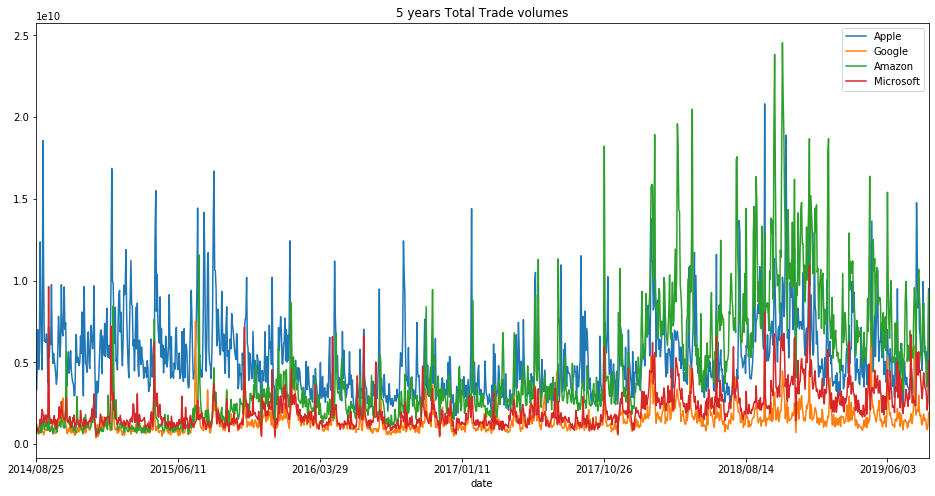

In [19]:
aapl["Total Trade"].plot(figsize=(16,8), label="Apple", title="5 years Total Trade volumes")
goog["Total Trade"].plot(label="Google")
amzn["Total Trade"].plot(label="Amazon")
msft["Total Trade"].plot(label="Microsoft")
plt.legend()

In [20]:
msft["Total Trade"].argmax()

'2018/12/21'

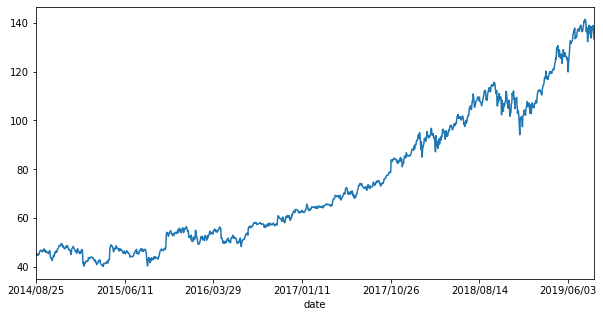

In [21]:
msft["close"].plot(figsize=(10,5))

In [22]:
msft["MA50"] = msft["close"].rolling(50).mean()
msft["MA200"] = msft["close"].rolling(200).mean()

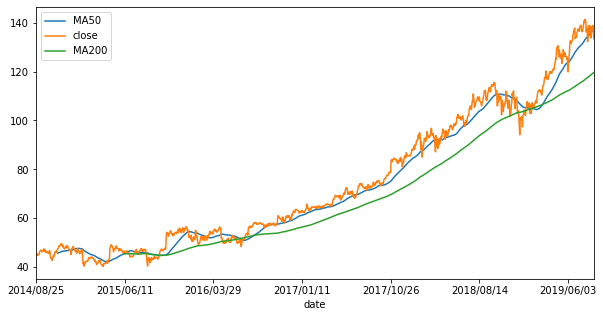

In [23]:
msft[["MA50","close", "MA200"]].plot(figsize=(10,5))

In [24]:
def moving_average_chart(dataset, title, column):
    dataset["MA50"] = dataset[column].rolling(50).mean()
    dataset["MA200"] = dataset[column].rolling(200).mean()
    dataset[["MA50",column, "MA200"]].plot(figsize=(10,5), title=title)

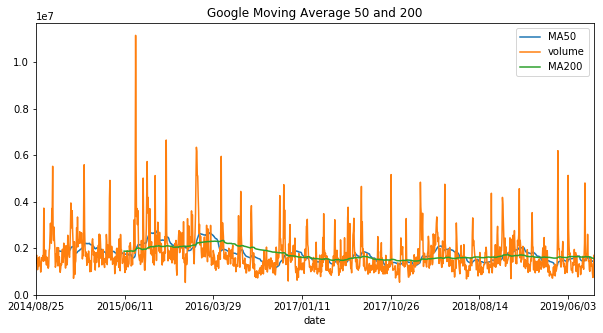

In [25]:
moving_average_chart(goog, "Google Moving Average 50 and 200", "volume")

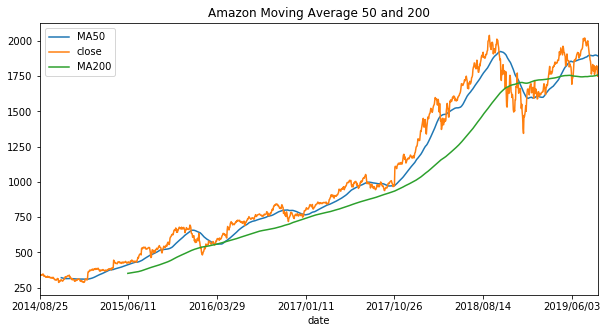

In [26]:
moving_average_chart(amzn, "Amazon Moving Average 50 and 200", "close")

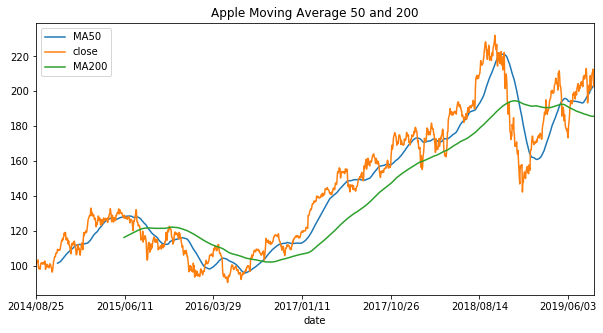

In [27]:
moving_average_chart(aapl, "Apple Moving Average 50 and 200", "close")

In [28]:
from pandas.plotting import scatter_matrix

In [29]:
all_companies = pd.concat([
    aapl["close"],
    amzn["close"],
    msft["close"],
    goog["close"]
], axis=1)

In [30]:
all_companies.columns = ["Apple", "Amazon", "Microsoft", "Google"]
all_companies.head()

,Apple,Amazon,Microsoft,Google
date,,,,
2014/08/25,101.540,334.02,45.170,580.20
2014/08/26,100.889,341.83,45.005,577.86
2014/08/27,102.130,343.18,44.870,571.00
2014/08/28,102.250,340.02,44.880,569.20
2014/08/29,102.500,339.04,45.430,571.60


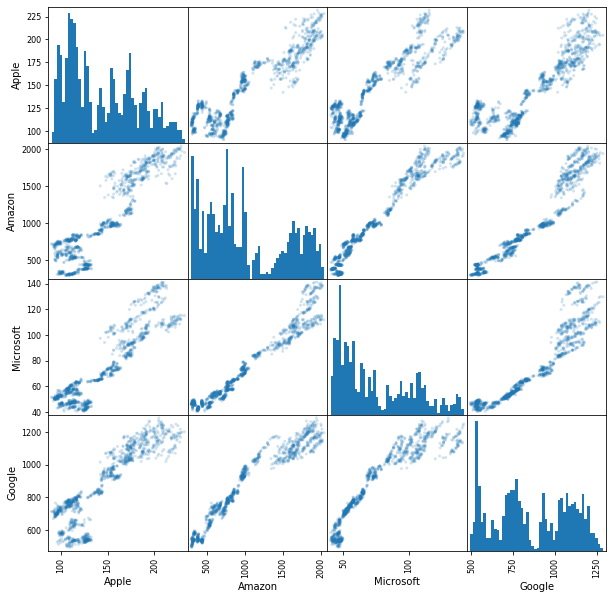

In [31]:
scatter_matrix(
    all_companies, 
    figsize=(10,10), 
    alpha=0.2, 
    hist_kwds={'bins': 50}
)
plt.show()

# Daily percentage change

# $r_t = \frac{p_t}{p_{t-1}} - 1$

In [32]:
def cal_daily_return(*args):
    for dataset in args:
        dataset["daily_return"] = (dataset["close"]/dataset["close"].shift(1))-1        

In [33]:
cal_daily_return(goog, amzn, msft, aapl)

In [34]:
goog.head(1)

,close,volume,open,high,low,Total Trade,MA50,MA200,daily_return
date,,,,,,,,,
2014/08/25,580.2,1357175.0,584.72,585.0,579.0,787432935.0,NaN,NaN,NaN


In [35]:
aapl.head(2)

,close,volume,open,high,low,Total Trade,MA50,MA200,daily_return
date,,,,,,,,,
2014/08/25,101.540,40087220.0,101.79,102.17,101.28,4.070456e+09,NaN,NaN,NaN
2014/08/26,100.889,33079170.0,101.42,101.50,100.86,3.337324e+09,NaN,NaN,-0.006411


## Histogram

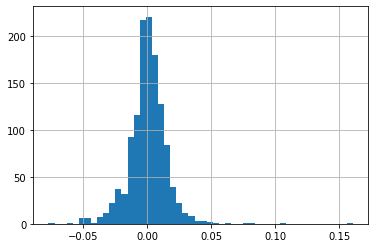

In [36]:
goog["daily_return"].hist(bins=50)

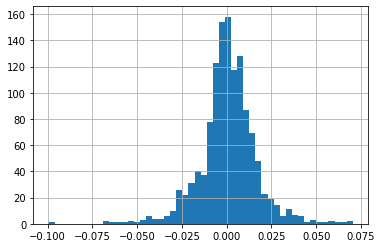

In [37]:
aapl["daily_return"].hist(bins=50)

In [38]:
def plot_histogram(labels, *args):
    concat_list = []
    for dataset in args:
        concat_list.append(dataset["daily_return"])
    
    merged_df = pd.concat(concat_list, axis=1)
    merged_df.columns = labels
    for col in merged_df.columns:
        merged_df[col].hist(bins=50, label=col, figsize=(10,6))
    plt.legend()
    return merged_df

In [39]:
# SOLUTION 2: Better one
def plot_histogram2(labels, *args):
    index = -1
    for dataset in args:
        index += 1 #increment by 1
        dataset["daily_return"].hist(bins=50, label=labels[index])
    plt.legend()

In [40]:
# SOLUTION 3: Event Better one
def plot_histogram3(labels,*args ):
    for dataset in args:
        dataset["daily_return"].hist(bins=50, figsize=(10,6), alpha=0.5)
    plt.legend(labels)

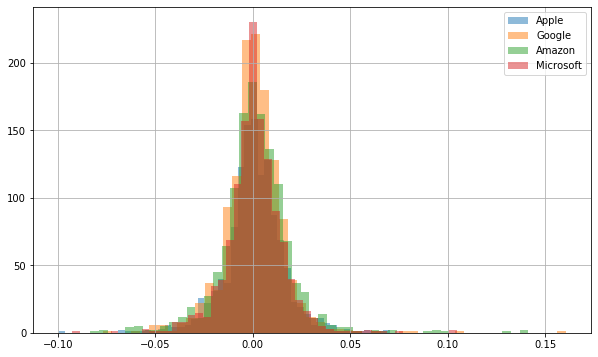

In [41]:
plot_histogram3(
    ["Apple", "Google", "Amazon", "Microsoft"],
    aapl, 
    goog, 
    amzn, 
    msft
)

In [42]:
# KDE
def plot_kde(labels, *args):
    index = -1
    for dataset in args:
        index += 1 #increment by 1
        dataset["daily_return"].plot(kind="kde", label=labels[index], figsize=(10,6))
    plt.legend()

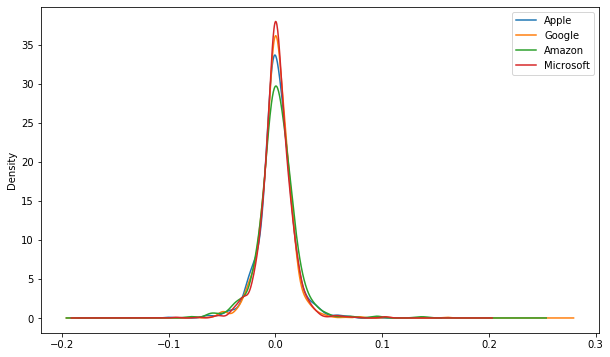

In [43]:
plot_kde(
    ["Apple", "Google", "Amazon", "Microsoft"],
    aapl, 
    goog, 
    amzn, 
    msft
)

In [44]:
box_df = pd.concat([
    aapl['daily_return'],
    goog['daily_return'],
    msft['daily_return'],
    amzn['daily_return']
], axis=1)
box_df.columns = ["Apple", "Google", "Microsoft", "Amazon"]

In [45]:
box_df.head()

,Apple,Google,Microsoft,Amazon
date,,,,
2014/08/25,NaN,NaN,NaN,NaN
2014/08/26,-0.006411,-0.004033,-0.003653,0.023382
2014/08/27,0.012301,-0.011871,-0.003000,0.003949
2014/08/28,0.001175,-0.003152,0.000223,-0.009208
2014/08/29,0.002445,0.004216,0.012255,-0.002882


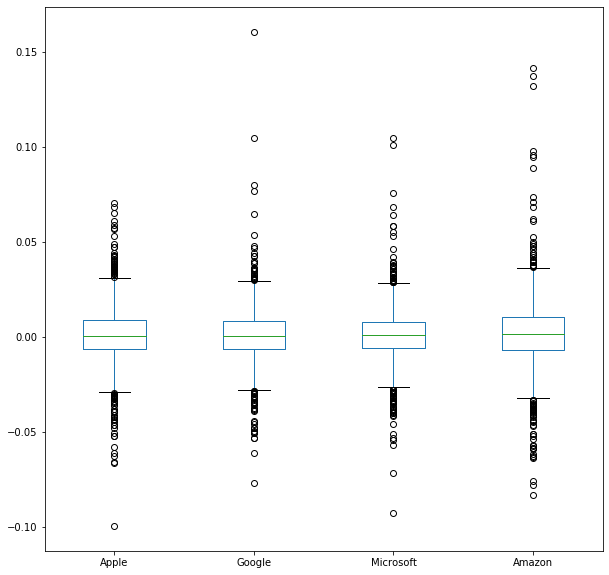

In [46]:
box_df.plot(kind="box", figsize=(10,10))

In [53]:
def plot_with_legend1(*args,column="close",w=15,h=5):
    def get_df_name(df):
        name=[x for x in globals() if globals()[x] is df][0]
        return name
    legendlist=[]
    for i in args:
        a=get_df_name(i)
        legendlist.append(a)
        i[column].plot(figsize=(w,h))
    plt.legend(legendlist,bbox_to_anchor=(1,1),loc='upper left',ncol=1)
    plt.xticks(rotation=45)

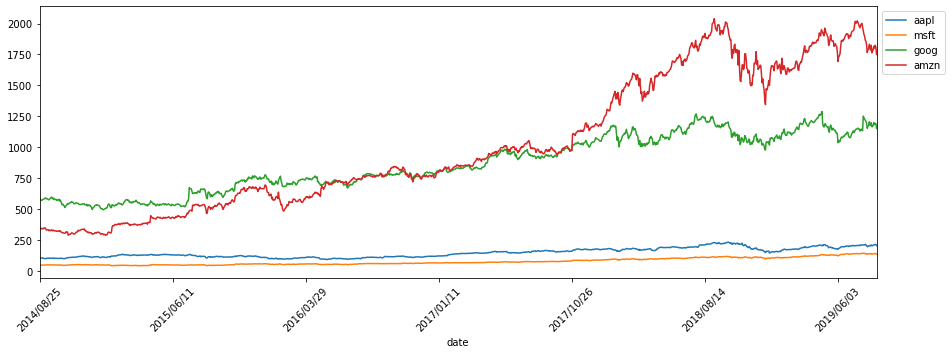

In [56]:
plot_with_legend1(aapl,msft,goog,amzn)